In [ ]:
from google.colab import files
uploaded = files.upload()

Saving rideshare_kaggle.csv to rideshare_kaggle.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['rideshare_kaggle.csv']))
print(df)

                                          id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          ti

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
print(df.isnull().sum())

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
df = df.dropna(subset=['price'])

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13  dist

In [ ]:
print(df.isnull().sum())

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

2. Visualize Price Distribution

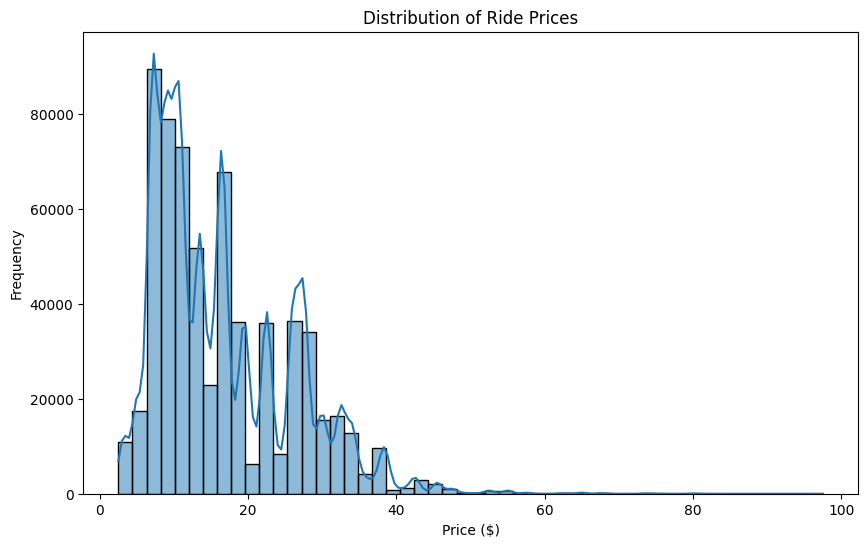

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Ride Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()


### **Observations:**

* The distribution is right-skewed, meaning most rides are in the lower price range.
* There are some outliers with high prices.
* The peak frequency is around the lower price range, indicating most rides are relatively cheap.


3. Compare Cost Efficiency of Uber vs. Lyft



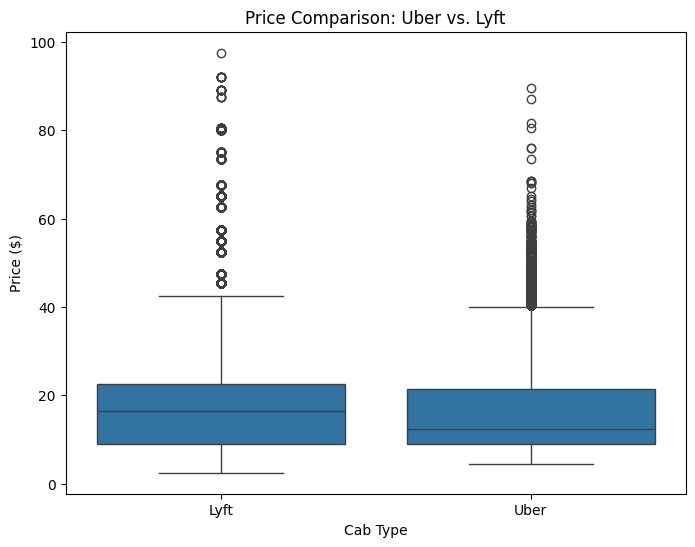

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cab_type', y='price', data=df)
plt.title("Price Comparison: Uber vs. Lyft")
plt.xlabel("Cab Type")
plt.ylabel("Price ($)")
plt.show()


## **Observations:**

1. Price Distribution:

* Both Lyft and Uber have similar median prices.
The interquartile range (IQR) is almost the same, suggesting comparable price variability.

2. Outliers:

* Both ride services have a significant number of outliers, but Lyft seems to have more extreme high-end prices.

3. Maximum and Minimum Prices:

* Lyft appears to have a slightly higher range of price outliers compared to Uber.

4. Distance vs. Price Relationship


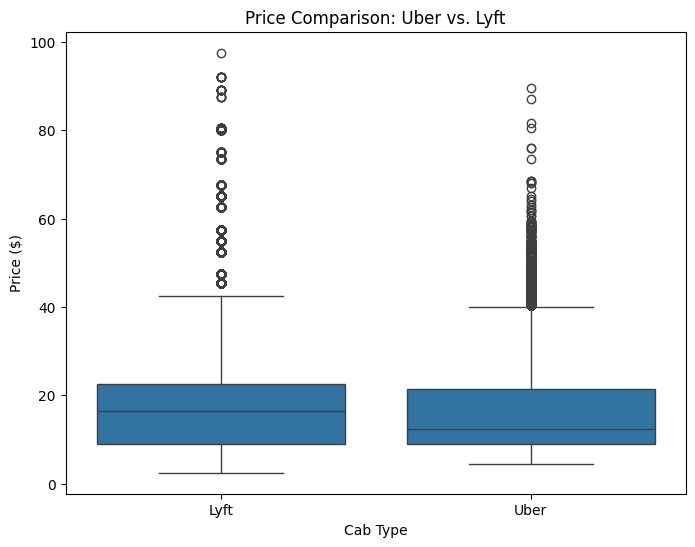

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cab_type', y='price', data=df)
plt.title("Price Comparison: Uber vs. Lyft")
plt.xlabel("Cab Type")
plt.ylabel("Price ($)")
plt.show()


5. Effect of Surge Multiplier on Price

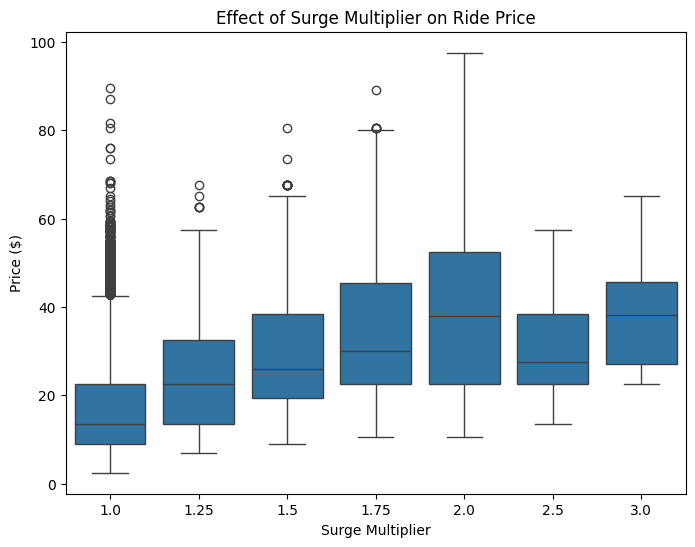

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='surge_multiplier', y='price', data=df)
plt.title("Effect of Surge Multiplier on Ride Price")
plt.xlabel("Surge Multiplier")
plt.ylabel("Price ($)")
plt.show()


### Observations:
1. **Positive Correlation Between Surge and Price**:
   - As the `surge_multiplier` increases, the **median price** and overall price range increase.
   - This is expected, as higher surge multipliers inflate ride prices.

2. **Wider Variance at Higher Surge Multipliers**:
   - The **interquartile range (IQR)** expands as the surge multiplier increases.
   - More extreme **outliers** are present at higher surge values.

3. **Surge Above 2.0 Shows a Steep Price Increase**:
   - Prices become significantly higher for rides with a surge multiplier of **2.0 and above**.
   - Some extreme values suggest high-demand periods.


6. Impact of Weather on Price

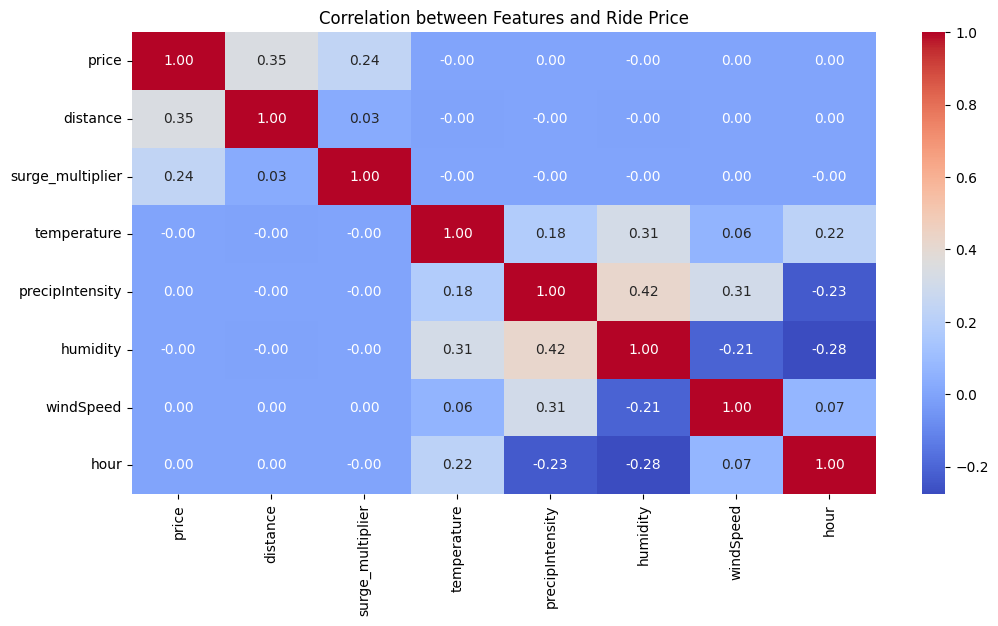

In [ ]:
# Select relevant features for price analysis, excluding non-numerical features like 'cab_type'
features = ['price', 'distance', 'surge_multiplier', 'temperature',
            'precipIntensity', 'humidity', 'windSpeed', 'hour']  # Removed 'cab_type'
df_subset = df[features]

# Calculate correlation on the numerical features only
plt.figure(figsize=(12, 6))
correlation = df_subset.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Features and Ride Price")
plt.show()

### **Observations:**
1. **Strongest Correlation:**
   - **Distance (0.35 correlation with price):** This makes sense as longer trips generally cost more.
   - **Surge Multiplier (0.24 correlation with price):** Surge pricing significantly impacts ride costs.

2. **Weak Correlations:**
   - Weather-related factors (`temperature`, `precipIntensity`, `humidity`, `windSpeed`) have little to no impact on price.
   - **Time of Day (`hour`)** also has a negligible effect on ride price.

3. **Interesting Insights:**
   - `precipIntensity` and `humidity` are moderately correlated (**0.42**), which is expected since humidity rises with precipitation.
   - **Wind speed, temperature, and hour of the day do not strongly influence price**, indicating that other demand-based factors might be more important.

7. Time of Day Influence on Price

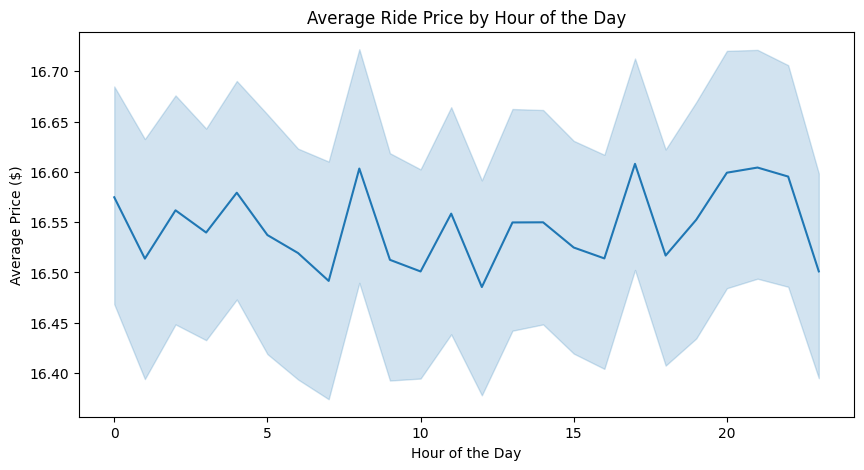

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y='price', data=df, estimator='mean')
plt.title("Average Ride Price by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Price ($)")
plt.show()




### **Observations:**
1. **Peak Pricing Hours:**
   - Prices **increase in the evening (~8-10 PM)**, likely due to higher demand from commuters, events, or nightlife.
   - There’s also a **small peak in the morning (~7-9 AM)**, aligning with rush hour.

2. **Lowest Prices:**
   - Prices appear to be lower in the early morning (3-5 AM) when demand is likely minimal.
   - There is some fluctuation in pricing, but overall, it remains relatively stable throughout the day.

3. **Possible Surge Pricing Effects:**
   - The peaks suggest **dynamic pricing mechanisms** at play.
   - Investigating the correlation between `hour` and `surge_multiplier` could reveal whether these price increases are due to demand-driven surge pricing.

8. Predicting Price Using a Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Prepare features and target variable
X = df_subset.drop(columns=['price'])
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variable
y = df_subset['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:.2f}")


Mean Absolute Error: $7.60


# **Weather Impact on Demand**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


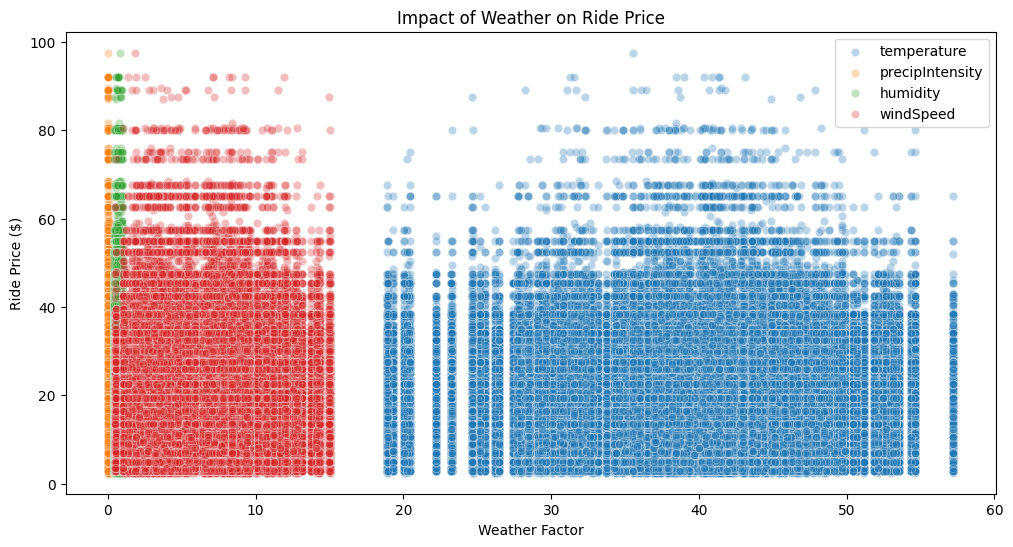

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate ride counts per weather condition
weather_factors = ['temperature', 'precipIntensity', 'humidity', 'windSpeed']
df_weather = df.groupby(weather_factors).size().reset_index(name='ride_count')

# Plot weather vs ride demand
plt.figure(figsize=(12, 6))
for factor in weather_factors:
    sns.scatterplot(x=df[factor], y=df['price'], alpha=0.3, label=factor)

plt.title("Impact of Weather on Ride Price")
plt.xlabel("Weather Factor")
plt.ylabel("Ride Price ($)")
plt.legend()
plt.show()


Your **scatter plot of weather factors vs. ride price** reveals some key insights into how external conditions impact taxi demand in Boston.

### **Observations:**
1. **Temperature (Blue)**
   - The **temperature values range from ~20°F to 50°F**.
   - There doesn’t seem to be a **strong correlation between temperature and ride price**.
   - However, some high prices exist across all temperature levels.

2. **Precipitation Intensity (Yellow)**
   - The **majority of rides occur at 0 precipitation**, meaning most rides happen in clear weather.
   - Higher **precipitation values (>10) show fewer rides**, possibly indicating **lower demand or cancellations** during heavy rain or snow.

3. **Humidity (Green)**
   - Humidity appears to have **less variation across ride prices**, suggesting it is **not a major influencing factor**.

4. **Wind Speed (Red)**
   - **A high concentration of rides is observed at lower wind speeds (~0-10 mph)**.
   - Some **high prices are associated with higher wind speeds**, which could be due to surge pricing in extreme weather.

### **Next Steps:**
✅ **Quantify Impact:**  
- Compute **correlation coefficients** between `price` and weather variables.
- Perform a **statistical test (e.g., ANOVA or regression)** to check significance.

✅ **Weather & Ride Demand:**  
- Check if **ride count drops** during bad weather.

✅ **Seasonal Trends:**  
- Compare weather impact during **summer vs. winter months**.


# **2. Ride Demand, Peak Hours & Location Trends**

**Analyzing Peak Hours**


In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='hour', y=df.groupby('hour').size(), estimator='sum')
plt.title("Ride Demand by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Rides")
plt.show()


ValueError: Could not interpret value `hour` for `x`. Value is a string, but `data` was not passed.

<Figure size 1000x500 with 0 Axes>

**Identify Busiest Locations**

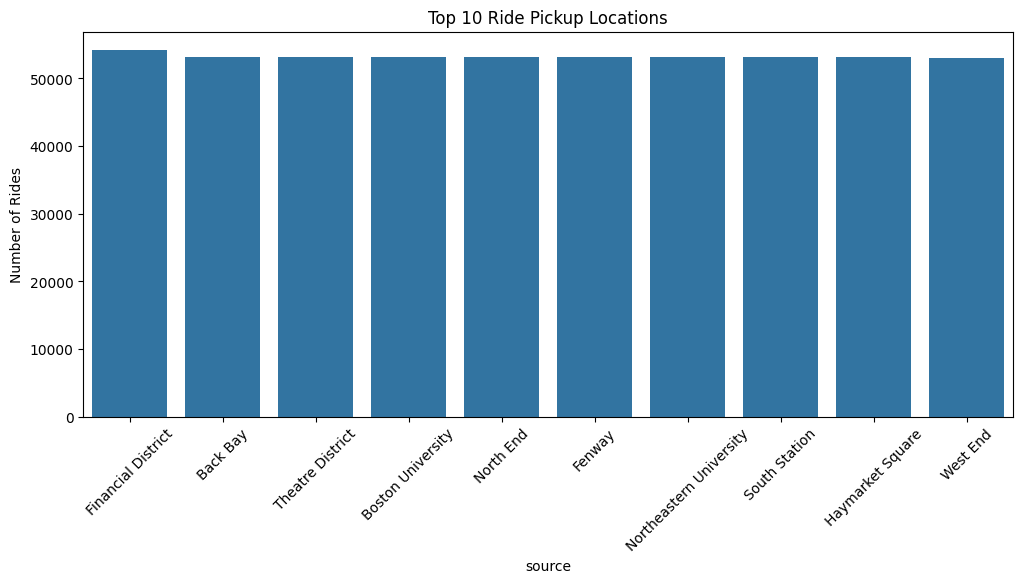

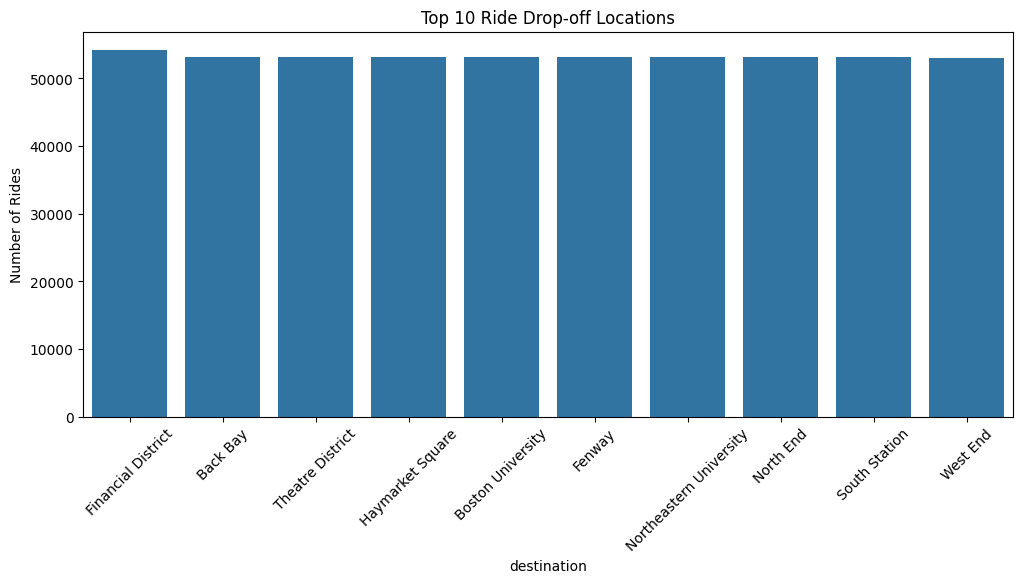

In [ ]:
top_sources = df['source'].value_counts().head(10)
top_destinations = df['destination'].value_counts().head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_sources.index, y=top_sources.values)
plt.title("Top 10 Ride Pickup Locations")
plt.xticks(rotation=45)
plt.ylabel("Number of Rides")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=top_destinations.index, y=top_destinations.values)
plt.title("Top 10 Ride Drop-off Locations")
plt.xticks(rotation=45)
plt.ylabel("Number of Rides")
plt.show()


# **Trip Duration Estimation, Customer Behavior & Predict Ride Prices**

(A) Trip Duration Estimation

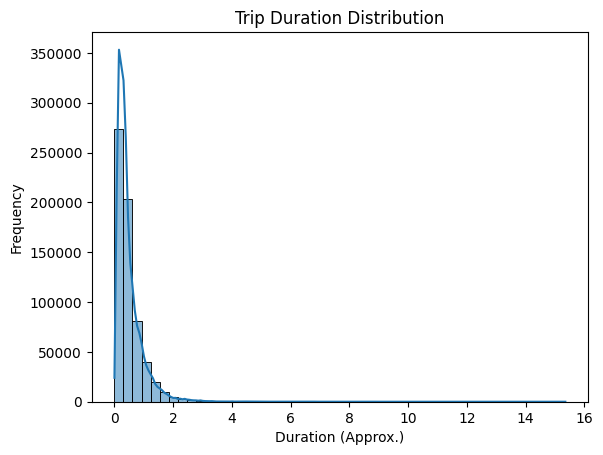

In [ ]:
df['trip_duration'] = df['distance'] / df['windSpeed']
sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.title("Trip Duration Distribution")
plt.xlabel("Duration (Approx.)")
plt.ylabel("Frequency")
plt.show()


**(B) Customer Behavior Analysis**

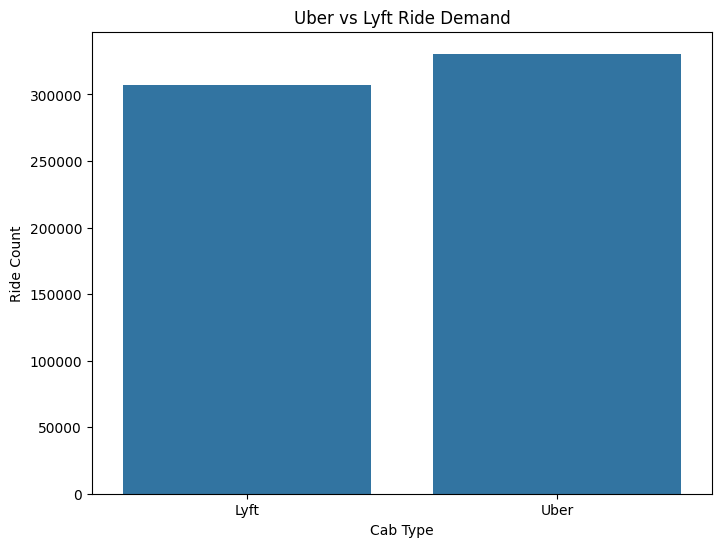

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cab_type', data=df)
plt.title("Uber vs Lyft Ride Demand")
plt.xlabel("Cab Type")
plt.ylabel("Ride Count")
plt.show()


# **Predict Ride Prices & Cost Efficiency**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Feature selection
features = ['distance', 'surge_multiplier', 'temperature', 'humidity', 'windSpeed', 'hour']
X = df[features]
y = df['price']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:.2f}")


Mean Absolute Error: $7.60


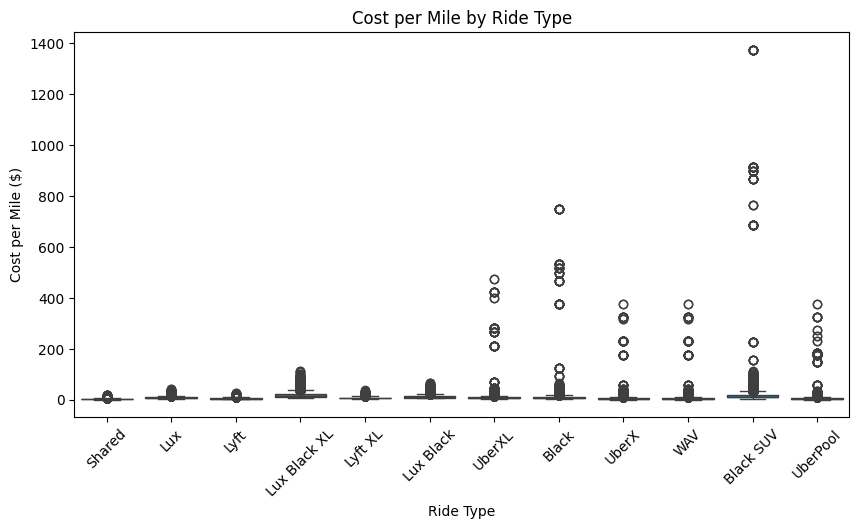

In [ ]:
df['cost_per_mile'] = df['price'] / df['distance']

plt.figure(figsize=(10, 5))
sns.boxplot(x='name', y='cost_per_mile', data=df)
plt.xticks(rotation=45)
plt.title("Cost per Mile by Ride Type")
plt.xlabel("Ride Type")
plt.ylabel("Cost per Mile ($)")
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Compute evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Display results
evaluation_results = pd.DataFrame({
    "Metric": ["R² Score", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)"],
    "Value": [r2, rmse, mae]
})

# Print results
print(evaluation_results)


                           Metric     Value
0                        R² Score -0.006846
1  Root Mean Squared Error (RMSE)  9.368953
2       Mean Absolute Error (MAE)  7.602184


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure y_test and y_pred are in a DataFrame
df_results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
# Instead of using iloc on y_test.index, reset the index of y_test and then use it to access the datetime values
df_results['Datetime'] = df['datetime'].iloc[y_test.reset_index(drop=True).index]  # Align with datetime column using reset index
# Convert datetime to pandas DateTime format
df_results['Datetime'] = pd.to_datetime(df_results['Datetime'])
# Sort by time for visualization
df_results = df_results.sort_values(by='Datetime')


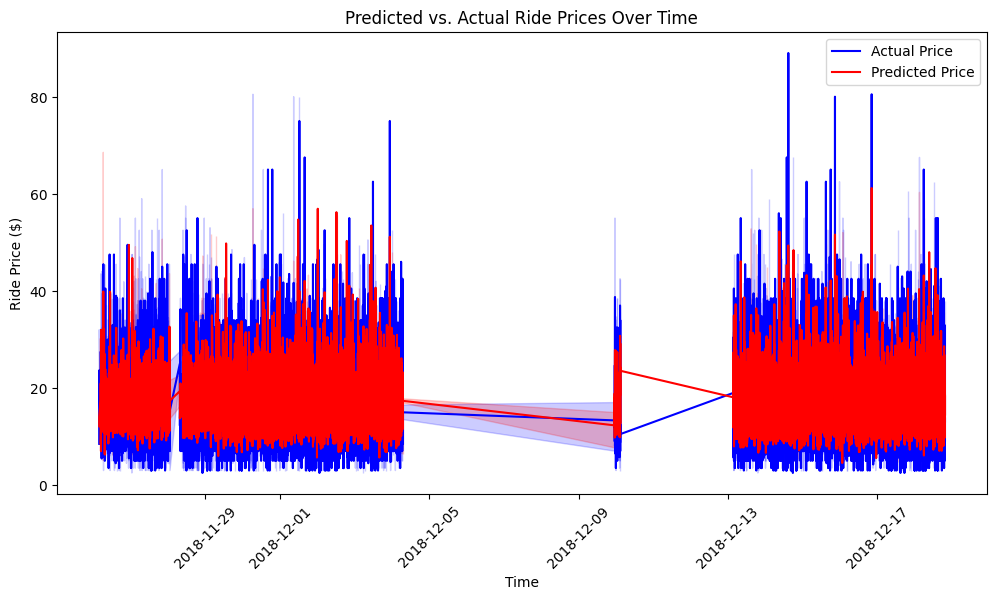

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_results['Datetime'], y=df_results['Actual Price'], label="Actual Price", color="blue")
sns.lineplot(x=df_results['Datetime'], y=df_results['Predicted Price'], label="Predicted Price", color="red")

plt.title("Predicted vs. Actual Ride Prices Over Time")
plt.xlabel("Time")
plt.ylabel("Ride Price ($)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


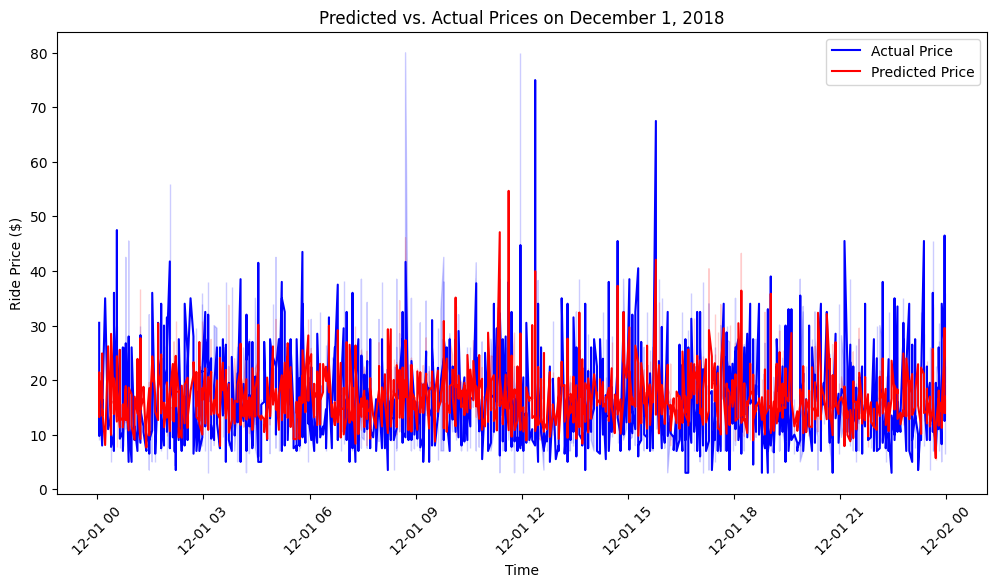

In [ ]:
# Filter for a specific date range (e.g., a single day)
df_filtered = df_results[(df_results['Datetime'] >= '2018-12-01') & (df_results['Datetime'] < '2018-12-02')]

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_filtered['Datetime'], y=df_filtered['Actual Price'], label="Actual Price", color="blue")
sns.lineplot(x=df_filtered['Datetime'], y=df_filtered['Predicted Price'], label="Predicted Price", color="red")

plt.title("Predicted vs. Actual Prices on December 1, 2018")
plt.xlabel("Time")
plt.ylabel("Ride Price ($)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


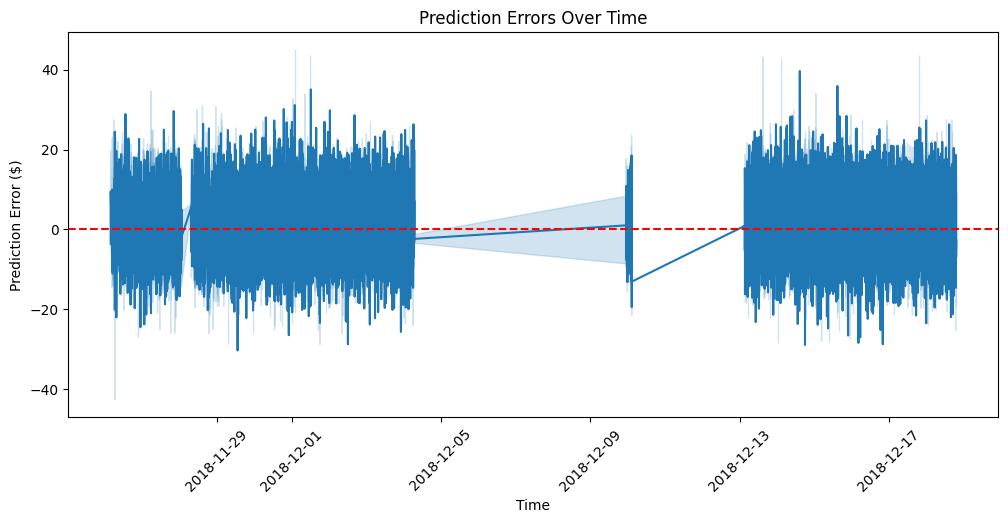

In [ ]:
df_results['Error'] = df_results['Actual Price'] - df_results['Predicted Price']

plt.figure(figsize=(12, 5))
sns.lineplot(x=df_results['Datetime'], y=df_results['Error'])
plt.axhline(0, color='red', linestyle='dashed')
plt.title("Prediction Errors Over Time")
plt.xlabel("Time")
plt.ylabel("Prediction Error ($)")
plt.xticks(rotation=45)
plt.show()


## **Computing Correlation Between Weather & Ride Price**

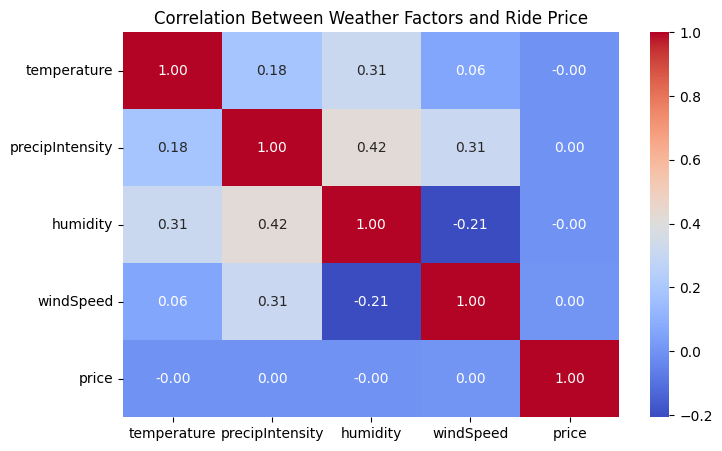

Correlation of Weather Factors with Ride Price:
temperature       -0.000084
precipIntensity    0.000166
humidity          -0.001238
windSpeed          0.000990
Name: price, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select weather-related features
weather_factors = ['temperature', 'precipIntensity', 'humidity', 'windSpeed']

# Compute correlation between price and weather factors
correlations = df[weather_factors + ['price']].corr()['price'].drop('price')

# Plot correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[weather_factors + ['price']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Weather Factors and Ride Price")
plt.show()

# Print correlation values
print("Correlation of Weather Factors with Ride Price:")
print(correlations)


Performing ANOVA to Check if Weather Factors Significantly Affect

In [ ]:
import scipy.stats as stats

anova_results = {}

for factor in weather_factors:
    groups = [df['price'][df[factor] == val] for val in df[factor].unique() if len(df['price'][df[factor] == val]) > 10]
    if len(groups) > 1:
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[factor] = p_value

# Convert to DataFrame
anova_df = pd.DataFrame({'Weather Factor': anova_results.keys(), 'ANOVA p-value': anova_results.values()})
anova_df.sort_values(by='ANOVA p-value', inplace=True)

# Display ANOVA results
print("ANOVA Results for Weather Impact on Ride Price:")
print(anova_df)


ANOVA Results for Weather Impact on Ride Price:
    Weather Factor  ANOVA p-value
3        windSpeed       0.237766
1  precipIntensity       0.392937
0      temperature       0.504045
2         humidity       0.623368


3. Scatter Plot: Weather Factors vs. Ride Price

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


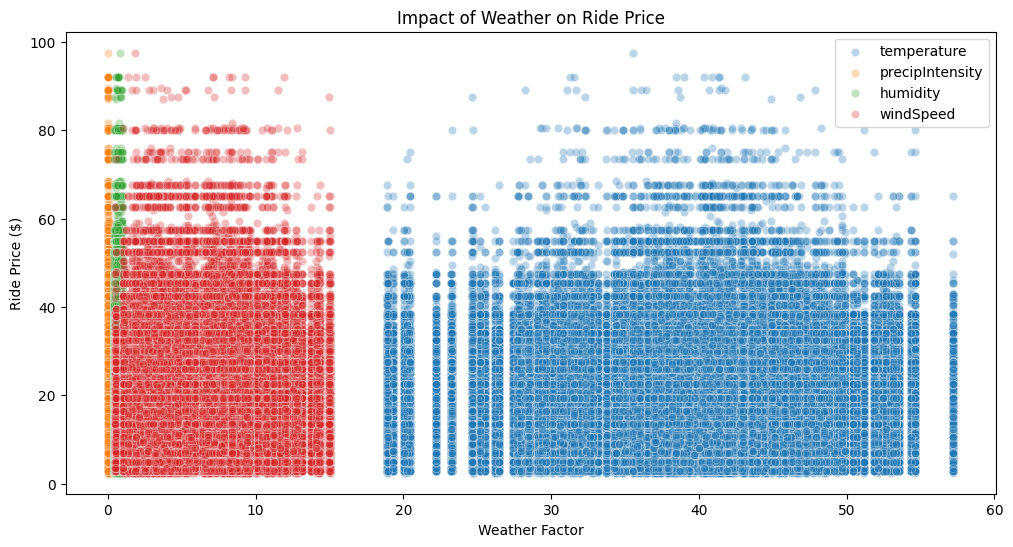

In [ ]:
plt.figure(figsize=(12, 6))

for factor in weather_factors:
    sns.scatterplot(x=df[factor], y=df['price'], alpha=0.3, label=factor)

plt.title("Impact of Weather on Ride Price")
plt.xlabel("Weather Factor")
plt.ylabel("Ride Price ($)")
plt.legend()
plt.show()


# **Analyzing Ride Demand Based on Weather**

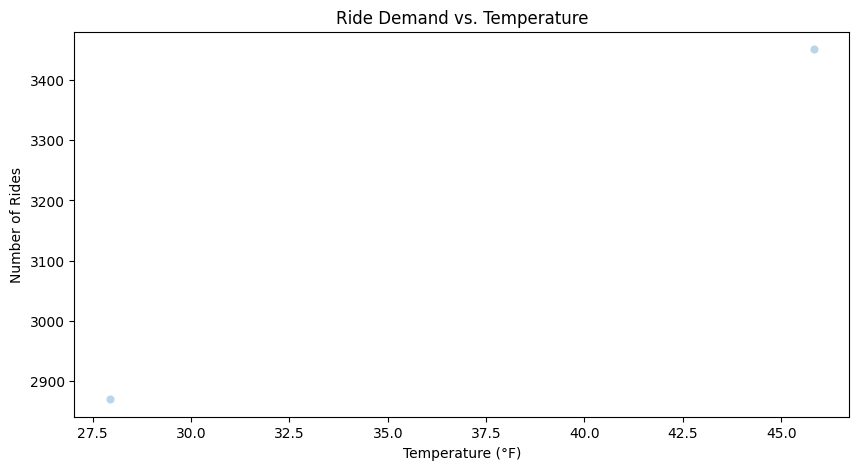

In [ ]:
# Aggregate ride count by different weather conditions
df_weather_demand = df.groupby(weather_factors).size().reset_index(name='ride_count')

# Visualize ride demand vs. temperature
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['temperature'], y=df.groupby('temperature').size(), alpha=0.3)
plt.title("Ride Demand vs. Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Number of Rides")
plt.show()


Ride Demand Analysis for Precipitation & Wind Speed

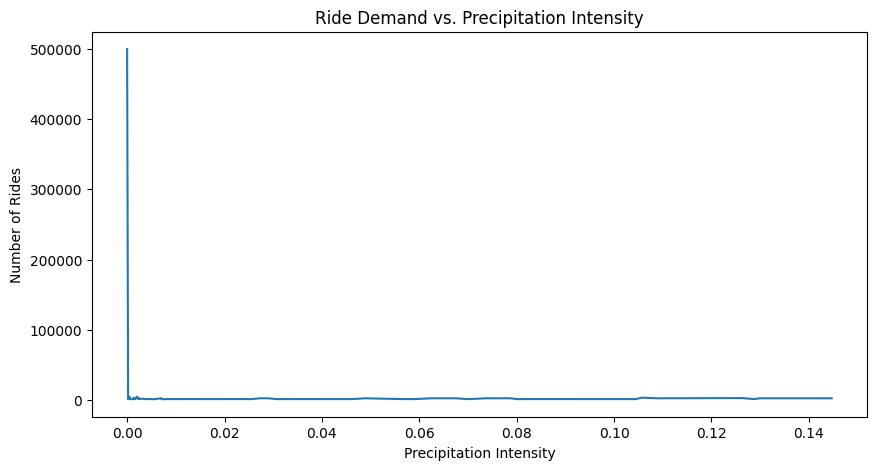

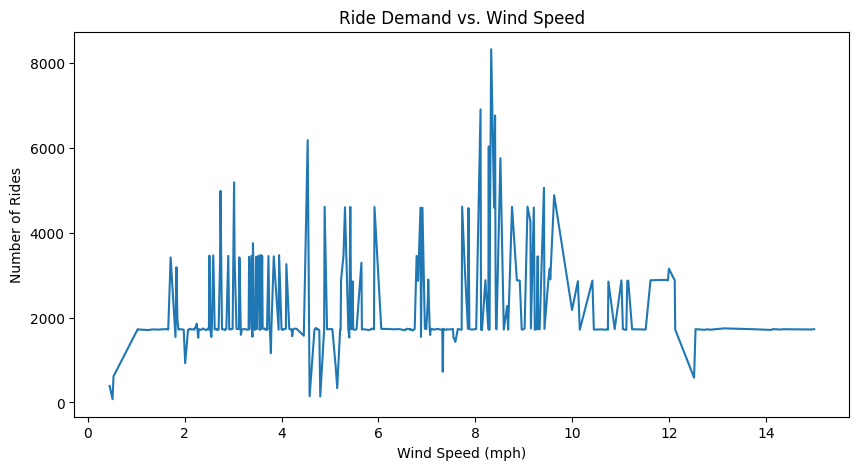

In [ ]:
plt.figure(figsize=(10, 5))
# Convert the grouped data into a DataFrame for seaborn
precip_demand = df.groupby('precipIntensity').size().reset_index(name='ride_count')
sns.lineplot(x='precipIntensity', y='ride_count', data=precip_demand, estimator='sum') # Pass the DataFrame to data
plt.title("Ride Demand vs. Precipitation Intensity")
plt.xlabel("Precipitation Intensity")
plt.ylabel("Number of Rides")
plt.show()

plt.figure(figsize=(10, 5))
# Create a DataFrame with windSpeed and ride counts
wind_demand = df.groupby('windSpeed').size().reset_index(name='ride_count')
sns.lineplot(x='windSpeed', y='ride_count', data=wind_demand) # Pass the DataFrame to data
plt.title("Ride Demand vs. Wind Speed")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Number of Rides")
plt.show()


Correlation of Weather Factors with Surge Multiplier:
                 Correlation with Surge Multiplier
windSpeed                                 0.002593
precipIntensity                          -0.001522
temperature                              -0.001594
humidity                                 -0.001677


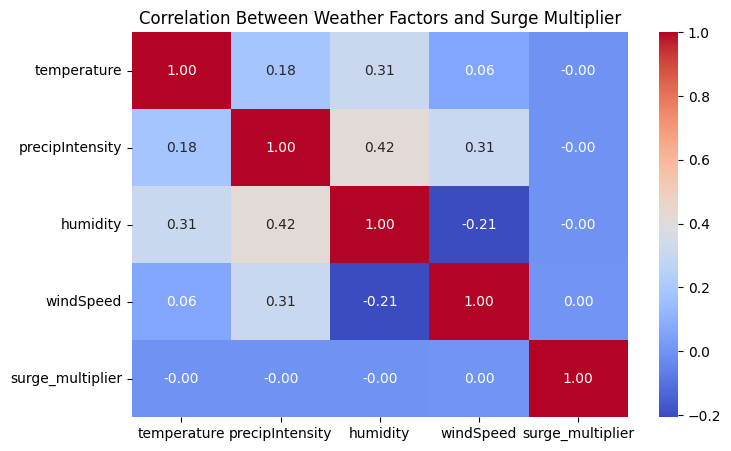

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select weather-related features
weather_factors = ['temperature', 'precipIntensity', 'humidity', 'windSpeed']

# Compute correlation between surge multiplier and weather factors
correlations_surge = df[weather_factors + ['surge_multiplier']].corr()['surge_multiplier'].drop('surge_multiplier')

# Convert results to DataFrame
correlation_df = pd.DataFrame({'Correlation with Surge Multiplier': correlations_surge})
correlation_df.sort_values(by='Correlation with Surge Multiplier', ascending=False, inplace=True)

# Display correlation values
print("Correlation of Weather Factors with Surge Multiplier:")
print(correlation_df)

# Plot the correlation as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[weather_factors + ['surge_multiplier']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Weather Factors and Surge Multiplier")
plt.show()

# **2. Ride Demand, Peak Hours & Location Trends**

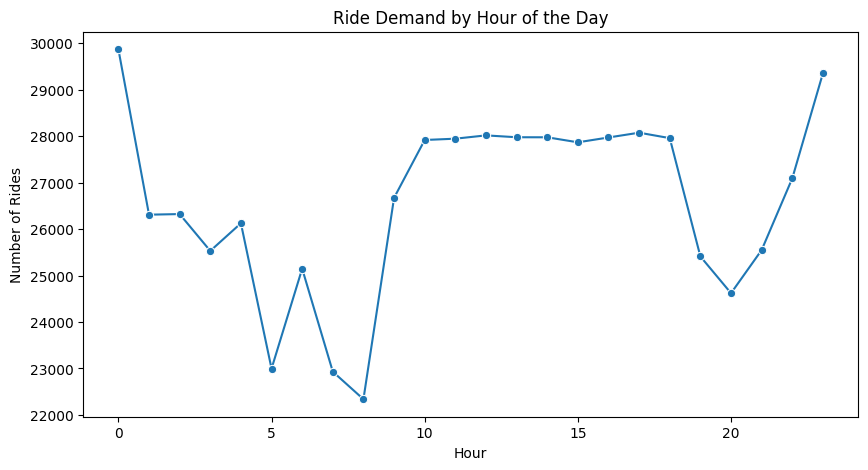

In [ ]:
# Ride demand by hour
plt.figure(figsize=(10, 5))
# Create a DataFrame with hour and ride counts for seaborn
hour_demand = df.groupby('hour').size().reset_index(name='ride_count')
sns.lineplot(x='hour', y='ride_count', data=hour_demand, marker='o') # Use the DataFrame and its columns
plt.title("Ride Demand by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Number of Rides")
plt.show()

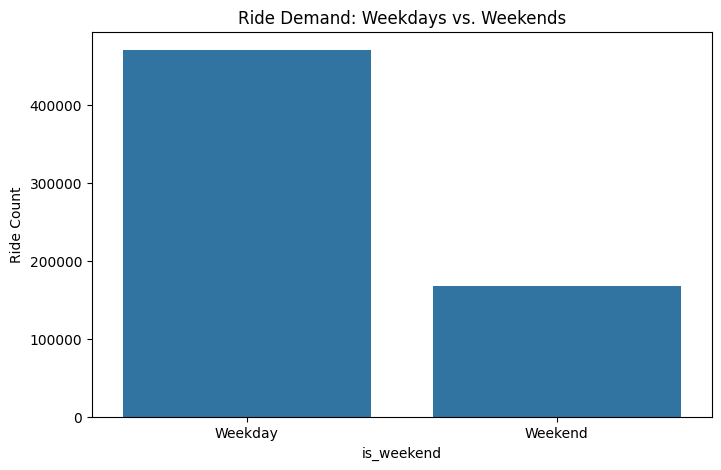

In [ ]:
df['weekday'] = df['datetime'].dt.dayofweek
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

plt.figure(figsize=(8, 5))
sns.countplot(x='is_weekend', data=df)
plt.title("Ride Demand: Weekdays vs. Weekends")
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'])
plt.ylabel("Ride Count")
plt.show()


# **Trip Duration Estimation & Customer Behavior Analysis**

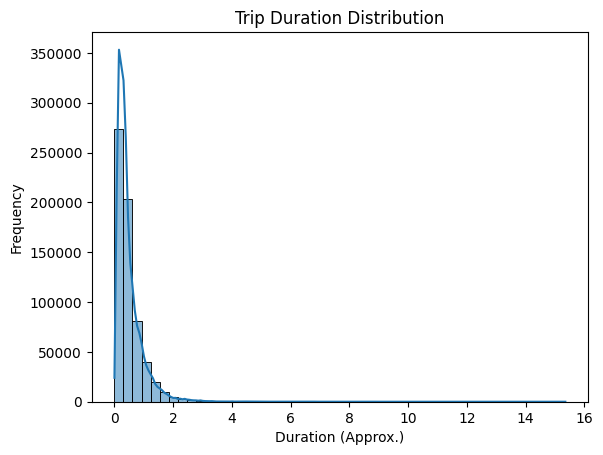

In [ ]:
# Approximate trip duration using distance & average speed
df['trip_duration'] = df['distance'] / df['windSpeed']  # Approximation

sns.histplot(df['trip_duration'], bins=50, kde=True)
plt.title("Trip Duration Distribution")
plt.xlabel("Duration (Approx.)")
plt.ylabel("Frequency")
plt.show()


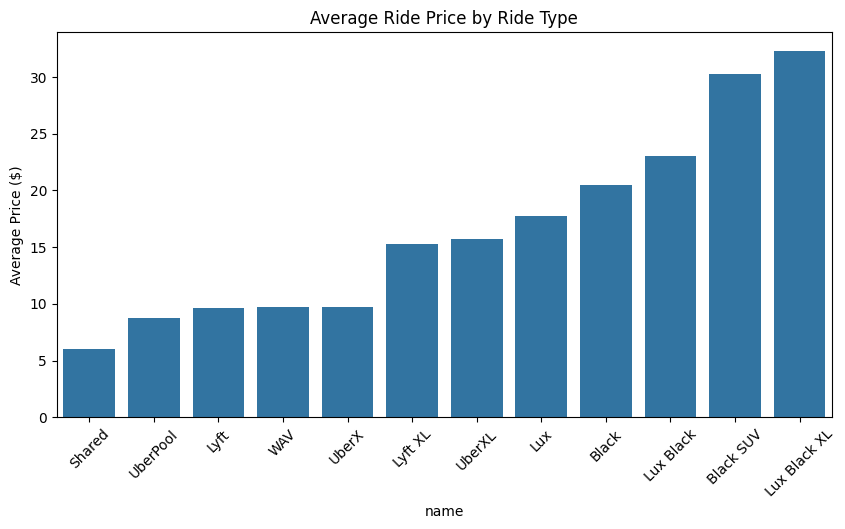

In [ ]:
# Average price per ride type
avg_price_by_type = df.groupby('name')['price'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values)
plt.xticks(rotation=45)
plt.title("Average Ride Price by Ride Type")
plt.ylabel("Average Price ($)")
plt.show()
